In [64]:
import tifffile as tiff
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [65]:
folder = Path(r'\\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\03_UT_data\Panel PEGASO\Pruebas Pegatinas\cobre\10111213\10')

filename = folder / '10.tif'

data = tiff.imread(filename)

#data is in the form z,x,y, where z is the depth, x is the width and y is the height
#data is a volume of signals, z is the signal x and y the pixels

data.shape

(511, 183, 52)

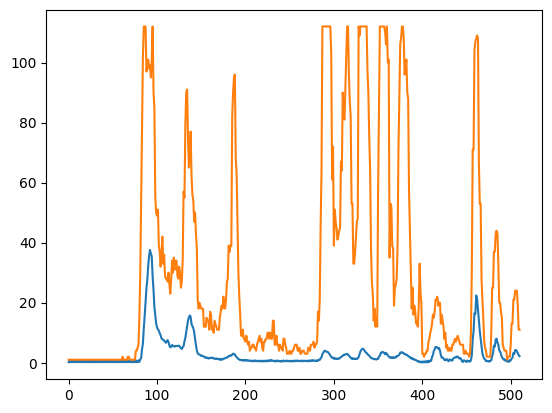

In [66]:
#get the mean signal of the volume
mean_signal = np.mean(data, axis=(1,2))
#get the maximum signal of the volume
max_signal = np.max(data, axis=(1,2))

#plot the mean signal
plt.plot(mean_signal)
#plot the maximum signal
plt.plot(max_signal)

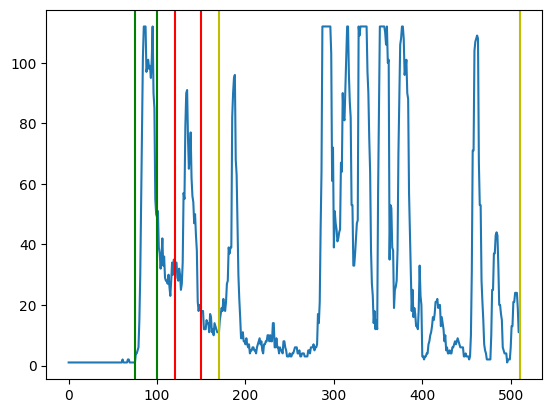

In [67]:
#gate1

gate1 = (75, 100)
gate2 = (120, 150)
gate3 = (170,data.shape[0]-1)

#plot the max_signal and a vertical line at the gates start and end, gate 1 in yellow, gate 2 in red
plt.plot(max_signal)
plt.axvline(gate1[0], color='g')
plt.axvline(gate1[1], color='g')
plt.axvline(gate2[0], color='r')
plt.axvline(gate2[1], color='r')
plt.axvline(gate3[0], color='y')
plt.axvline(gate3[1], color='y')

In [97]:
def aligner(data, gate1):

    data_lin = data.reshape(data.shape[0], -1)

    #get the gated data
    gated_data = data_lin[gate1[0]:gate1[1],:,:]
    
    #get the index of the max of the gated data
    max_gated_data_index = np.argmax(gated_data, axis=0)

    #translate each signal n points to the left being n the max_gated_data_index of each signal
    aligned_data = np.zeros_like(data_lin)
    for i in range(data_lin.shape[0]):
        aligned_data[i] = np.roll(data_lin[i], -max_gated_data_index[i])
        print(max_gated_data_index[i])
    
    return aligned_data.reshape(data.shape)

In [98]:
aligned = aligner(data, gate1)

2
0
0
0
2
0
2
0
0
0
0
0
2
0
0
1
0
0
2
2
0
0
0
0
2
0
0
0
2
2
0
0
2
0
0
0
0
0
4
0
2
0
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
2
0
2
0
2
0
0
0
0
0
0
0
2
0
0
0
0
1
0
2
0
0
0
0
0
2
0
2
0
2
0
0
2
2
1
0
0
0
0
0
2
0
0
0
0
0
0
1
8
8
8
8
8
8
8
8
8
8
8
2
0
0
0
4
8
9
8
9
9
9
9
0
0
1
0
9
9
9
9
1
9
9
10
10
0
10
2
2
0
0
0
0
0
0
0
0
0
0
0
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
8
8
8
9
9
9
9
9
9
9
9
9
9
9
10
9
9
12
0
0
0
2
0
0
0
0
2
8
11
9
11
9
9
9
10
10
10
10
10
10
8
8
8
8
8
8
10
10
8
10
8
10
10
8
8
9
9
9
10
10
10
9
11
9
9
9
11
9
9
9
9
0
0
0
0
0
0
8
8
8
9
9
9
9
9
9
9
9
10
10
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
10
11
11
11
11
11
9
9
9
9
0
2
1
0
8
8
9
9
9
9
9
9
9
9
11
10
11
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
9
9
9
0
2
2
8
11
11
9
11
11
11
11
11
11
9
11
10
11
11
10
10
10
10
10
10
11
10
12
12
12
12
12
10
10
10
10
10
11
11
10
10
11
11
11
11
11
11
11
11
11
11
9
9
10
2
0
8
8
9
9
11
11
11
11
11
11
11


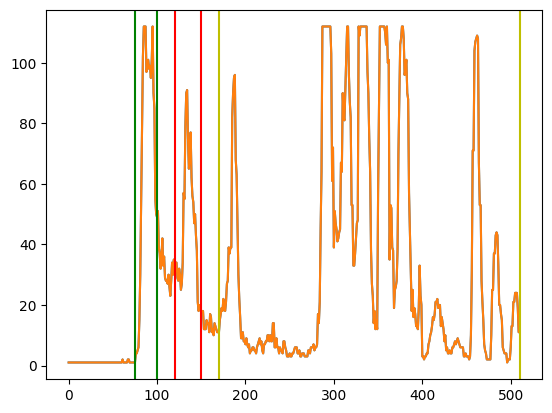

In [94]:
#get the mean signal of the volume
mean_signal2 = np.mean(aligned, axis=(1,2))
#get the maximum signal of the volume
max_signal2 = np.max(aligned, axis=(1,2))

#plot the mean signal
plt.plot(max_signal)
#plot the maximum signal
plt.plot(max_signal2)
#plot the max_signal and a vertical line at the gates start and end, gate 1 in yellow, gate 2 in red
plt.axvline(gate1[0], color='g')
plt.axvline(gate1[1], color='g')
plt.axvline(gate2[0], color='r')
plt.axvline(gate2[1], color='r')
plt.axvline(gate3[0], color='y')
plt.axvline(gate3[1], color='y')

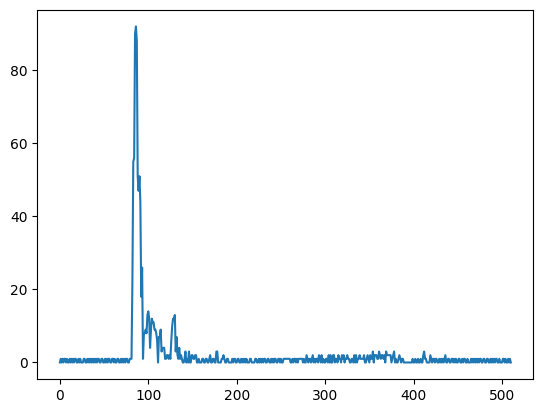

In [82]:
index = (20,15)

plt.plot(data[:,index[0],index[1]])


In [92]:
signal = data[:,index[0],index[1]]

#get the gated data
gated_data = signal[gate1[0]:gate1[1]]

#get the index of the max of the gated data
max_gated_data_index = np.argmax(gated_data, axis=0)

rolled = np.roll(signal, -max_gated_data_index)

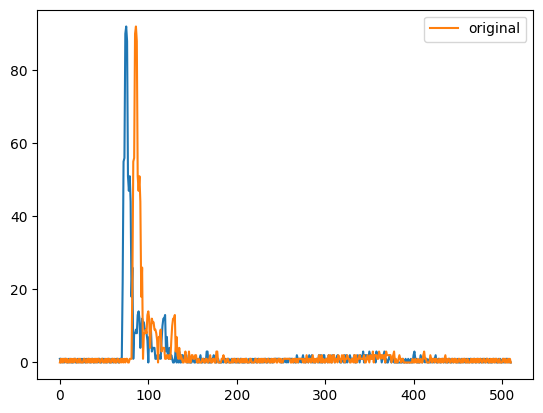

In [93]:
plt.plot(rolled)
plt.plot(signal, label='original')
plt.legend()